이 데이터를 사용하는 이유 : 출퇴근 시간대와 평일과 주말에 발생하는 범죄 발생횟수를 조사해서 범죄 발생 가능성을 알아본다. 

In [0]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.unicode_minus'] = False

In [0]:
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\HYHWPEQ.TTF'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [0]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothic') # For Windows

In [0]:
df = pd.read_excel('timeandcrime.xlsx') 
df.head()

,범죄대분류,범죄중분류,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,20,28,31,21,38,38,53,43,29,30,51,42,43,57,45,33
1,강력범죄,살인미수등,47,41,44,62,47,62,72,98,51,74,76,78,73,67,73,83
2,강력범죄,강도,132,162,58,69,74,87,99,134,152,151,123,139,142,139,142,131
3,강력범죄,강간,720,886,383,353,309,330,397,688,1157,890,690,667,680,665,757,874
4,강력범죄,유사강간,82,101,58,43,49,50,51,73,129,107,81,79,82,67,116,104


In [0]:
df=df.set_index('범죄중분류')

In [0]:
df.head()

,범죄대분류,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59,미상,일,월,화,수,목,금,토
범죄중분류,,,,,,,,,,,,,,,,,
살인기수,강력범죄,20,28,31,21,38,38,53,43,29,30,51,42,43,57,45,33
살인미수등,강력범죄,47,41,44,62,47,62,72,98,51,74,76,78,73,67,73,83
강도,강력범죄,132,162,58,69,74,87,99,134,152,151,123,139,142,139,142,131
강간,강력범죄,720,886,383,353,309,330,397,688,1157,890,690,667,680,665,757,874
유사강간,강력범죄,82,101,58,43,49,50,51,73,129,107,81,79,82,67,116,104


In [0]:
df["평일"]=df["월"]+df["화"]+df["수"]+df["목"]+df["금"]
df["주말"]=df["토"]+df["일"]

df.head()
# 평일과 주말로 나눠서 열 만들기

,범죄대분류,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59,미상,일,월,화,수,목,금,토,평일,주말
범죄중분류,,,,,,,,,,,,,,,,,,,
살인기수,강력범죄,20,28,31,21,38,38,53,43,29,30,51,42,43,57,45,33,238,63
살인미수등,강력범죄,47,41,44,62,47,62,72,98,51,74,76,78,73,67,73,83,367,157
강도,강력범죄,132,162,58,69,74,87,99,134,152,151,123,139,142,139,142,131,685,282
강간,강력범죄,720,886,383,353,309,330,397,688,1157,890,690,667,680,665,757,874,3459,1764
유사강간,강력범죄,82,101,58,43,49,50,51,73,129,107,81,79,82,67,116,104,425,211


#### 시간 별로 나눈 범죄 분류

In [0]:
df_day=df.iloc[:, :9]
df_day

,범죄대분류,00:00-02:59,03:00-05:59,06:00-08:59,09:00-11:59,12:00-14:59,15:00-17:59,18:00-20:59,21:00-23:59
범죄중분류,,,,,,,,,
살인기수,강력범죄,20,28,31,21,38,38,53,43
살인미수등,강력범죄,47,41,44,62,47,62,72,98
강도,강력범죄,132,162,58,69,74,87,99,134
강간,강력범죄,720,886,383,353,309,330,397,688
유사강간,강력범죄,82,101,58,43,49,50,51,73
강제추행,강력범죄,1994,1981,1527,1309,1363,1730,2398,3142
기타 강간 강제추행등,강력범죄,30,38,19,25,23,24,23,42
방화,강력범죄,157,140,85,110,161,154,203,249
절도범죄,절도범죄,13734,14362,12491,21376,24533,26865,26609,22137


### 강제추행 손괴 성풍속범죄들이 자주 일어나는 시간대

In [0]:
df_day.mean()
# 요일 별로 위의 세가지 범죄 행위(강제 추행, 손괴, 성풍속범죄)들이 일어나는 횟수를 요일별로 평균내어 나타낸것

일    5413.921053
월    6242.578947
화    6428.789474
수    6440.289474
목    6538.526316
금    6697.921053
토    5983.789474
dtype: float64

#### 요일 별로 나눈 범죄 분류

In [0]:
df_day=df.iloc[:, 10:17] # 요일만 끌어와서 새로운 데이터 프레임으로 만든다.
df_day

,일,월,화,수,목,금,토
범죄중분류,,,,,,,
살인기수,30,51,42,43,57,45,33
살인미수등,74,76,78,73,67,73,83
강도,151,123,139,142,139,142,131
강간,890,690,667,680,665,757,874
유사강간,107,81,79,82,67,116,104
강제추행,2619,2309,2404,2467,2565,2685,2898
기타 강간 강제추행등,46,35,38,45,38,38,64
방화,217,193,196,188,209,181,188
절도범죄,25926,25011,24799,25147,25746,27505,29623


In [0]:
df_day_choice=df_day.iloc[[5,16,26], :]
df_day_choice
# 많은 데이터 중에서도 위의 세가지 데이터들만 조사하겠다.

,일,월,화,수,목,금,토
범죄중분류,,,,,,,
강제추행,2619,2309,2404,2467,2565,2685,2898
손괴,8519,7439,7507,7507,7674,8326,9311
성풍속범죄,1709,1983,2014,1999,2134,2073,1900


#### 주말, 평일로 나눈 범죄분류

In [0]:
df_week=df.iloc[:, 17:]
df_week

,평일,주말
범죄중분류,,
살인기수,238,63
살인미수등,367,157
강도,685,282
강간,3459,1764
유사강간,425,211
강제추행,12430,5517
기타 강간 강제추행등,194,110
방화,967,405
절도범죄,128208,55549


In [0]:
df_week_choice=df_week.iloc[[5,16,26], :]
df_week_choice
# 평일과 주말로 나눠서 3가지 범죄 행위가 발생한 총 횟수를 구한다. 

,평일,주말
범죄중분류,,
강제추행,12430,5517
손괴,38453,17830
성풍속범죄,10203,3609


In [0]:
crime.columns=['평균 범죄 횟수']
crime
# 완성된 표 아래 표를 사용하면됨

,평균 범죄 횟수
범죄중분류,
강제추행,8973.5
손괴,28141.5
성풍속범죄,6906.0


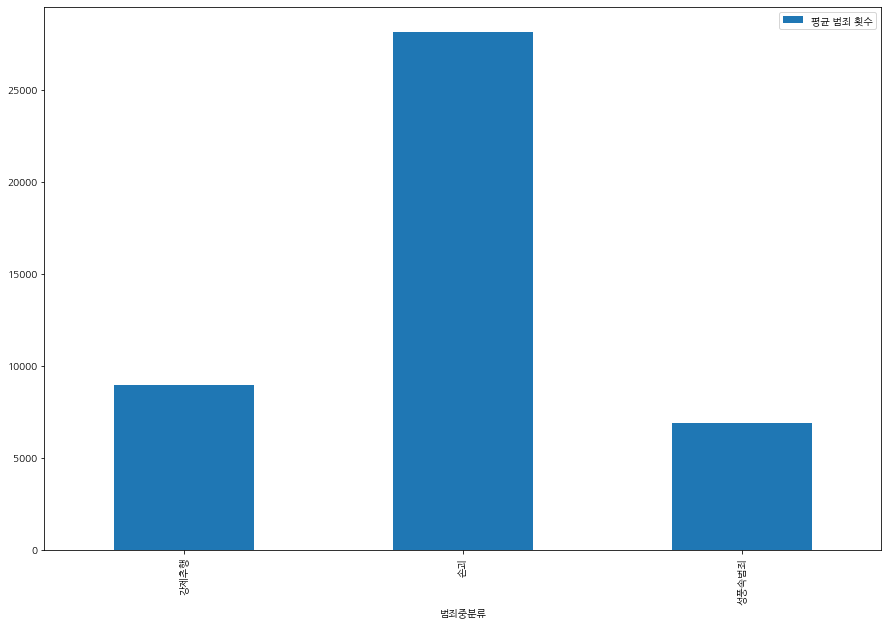

In [0]:
crime.plot(kind='bar')
# 3가지 범죄 행위에 대한 평균 범죄 횟수